In [2]:
import numpy as np
import os
#import pint
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 10,7


#ureg = pint.UnitRegistry()

In [3]:
ROOT = '/home/maxsen/DEEPL/data/training_data/test/'
ROOT = '/data/proj/smFISH/Students/Max_Senftleben/files/data/20190422_AMEX_transfer_nuclei/npy/'
list_of_images = [ROOT + i for i in os.listdir(ROOT)]
#size_of_pixel = 0.11*ureg.micrometer * 0.11*ureg.micrometer
size_of_pixel = 0.11 * 0.11

In [4]:
def get_pixel_area(numpy_array, size_of_pixel):
    height, width, dim = numpy_array.shape
    dsplits = np.dsplit(numpy_array, dim)
    
    '''
    # used to show the masks
    plt.imshow(np.dstack((dsplits[0], dsplits[0], dsplits[0])))
    plt.show()
    for i in dsplits:
        plt.imshow(np.dstack((i*100, i*100, i*100)))
        plt.show()
    '''
    dsplits = dsplits[1:]
    db = {1:[], 2:[], 3:[]}
    
    counts = [np.unique(one_array, return_counts=True) for one_array in dsplits]
    counts = [list(i) for i in counts]
    for i in counts:
        index = i[0][1]
        count = i[1][1] * size_of_pixel
        db[index].append(count)
        
    return db

In [76]:
def plot_nuclei_size(list_of_sizes, num_bins):

    
    

    import matplotlib.mlab as mlab
    
    fig, ax = plt.subplots()
    
    mu = np.mean(list_of_sizes)  # mean of distribution
    sigma = np.std(list_of_sizes)  # standard deviation of distribution
    print('Mean size: ', mu)
    print(sum(list_of_sizes)/len(list_of_sizes))

    n, bins, patches = ax.hist(x=list_of_sizes, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.9)
    print(len(bins))
    y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
    y = mlab.normpdf(bins, mu, sigma) * sum(n * np.diff(bins))
    
    ax.plot(bins, y, '--', color = 'r')
    ax.set_xlabel('Size in \u03BCm**2')
    ax.set_ylabel('Frequency')
    ax.text(200, 600, "Mean = 138.86 \u03BCm**2")
    ax.grid(axis='y', alpha=0.75)
    # Tweak spacing to prevent clipping of ylabel
    fig.tight_layout()
    plt.xlim(0,400)
    maxfreq = np.max(n)
    plt.ylim(0, 800)
    plt.savefig('/home/max/mrcnn_b_work/folder_to_send/size_histo.png', dpi=100)
    
    plt.show()
    

In [77]:
def iterate_through_images(folder, size_of_pixel):
    all_nuclei_sizes = []
    for img in list_of_images:
        numpy_array = np.load(img)
        counts = get_pixel_area(numpy_array, size_of_pixel)
        #print(img)
        if 1 in counts:
            [all_nuclei_sizes.append(i) for i in counts[1]]

    return all_nuclei_sizes

In [27]:
all_sizes = iterate_through_images(list_of_images, size_of_pixel)


7437
0.5175473981444131
Mean size:  138.8590468199543
138.85904681995368
190


/home/max/anaconda3/envs/pt_mask_Rcnn_env/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


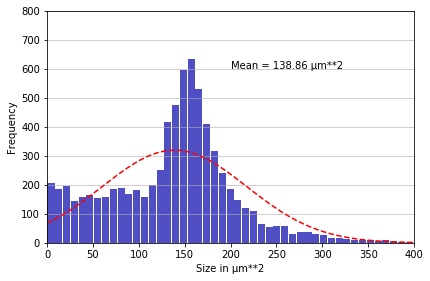

In [80]:
print(len(all_sizes))
between_110_170 = [i for i in all_sizes if i>99 and i<181]
print(len(between_110_170)/len(all_sizes))
plot_nuclei_size(all_sizes, len(all_sizes))